In [1]:
import numpy as np
import pandas
import math

If possible, update your sklearn version to 1.3.2 to reduce variance in the versions.

In [2]:
#!pip3 install scikit-learn==1.3.2

In [3]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.4.1.post1.


## Gradient Descent

- Functions from description

In [4]:
def sigma(x):
    return math.exp(x)/(math.exp(x) + 1) 

def f(u,v,b):
    return -math.log(sigma(u+b)) - math.log(sigma(v+b)) - math.log(sigma(-u/2 - v/2 - b)) + (u**2 + v**2 + b**2)/100

- Gradient of f is a vector (list in python) consisting of three partial derivatives. Each partial derivative is on one of coordinate of the point (u,v,b).

In [5]:
#Write only the derivatives of the terms (which is very convenient using sigma) and let the code compute the result of the partial derivative
def alt_grad_f(u,v,b):
    a_dfu = -sigma(-(u+b)) - 0 + sigma((u+v+2*b)/2)/2 + u/50

    a_dfv = -sigma(-(v+b)) - 0 + sigma((u+v+2*b)/2)/2 + v/50

    a_dfb = -sigma(-(u+b)) - sigma(-(v+b)) + sigma((u+v+2*b)/2) + b/50

    return [a_dfu, a_dfv, a_dfb]

Gradient descent function

In [6]:
def gradient_descent(f, grad_f, eta, u_0, v_0, b_0, max_iter=100):
    curX = [u_0, v_0, b_0]  #Current point coordinates
    best = 1000000000 #Initial best score
    min_t = 1 #Initial best step
    t = 0
    while t < max_iter: 
        t = t + 1
        step_size = eta(t) #Get step size at each iteration
        #print(step_size,t)
        #Calculate the new points
        gradient_result  = grad_f(curX[0],curX[1],curX[2]) 
        for i in range (3):
            curX[i]= curX[i] - step_size * gradient_result[i]
        
        #Check whether f(u_t,v_t,b_t) is the smaller than the current smallest result
        cur_f = f(curX[0],curX[1],curX[2])
        #print(cur_f)
        if(cur_f < best): 
            best = cur_f
            min_t = t

    curX.append(best)
    curX.append(min_t) #return u_100, v_100, b_100, smallest result and its t
    return curX 

#Step-size functions
def eta_const(t, c=0.2):
    return c

def eta_sqrt(t,c=0.5):
    return c / math.sqrt(t+1)

def eta_multistep(t, milestones, c, eta_init):
    i = 0
    while i < len(milestones):
        if(t < milestones[i]):
            return eta_init * (c**i)
        i+=1
    return eta_init * (c**i)

#Initial points
u_0 = 4
v_0 = 2
b_0 = 1

#Print result
def print_result(result):
    #print(result)

    u_100 = result[0]
    v_100 = result[1]
    b_100 = result[2]

    answer = f(u_100, v_100, b_100)
    print("f(u_100, v_100, b_100) = ", round(answer,3))
    print("Min val", round(result[3],3))

Results

In [7]:
#Part A
result = gradient_descent(f, alt_grad_f, lambda t: eta_const(t, c=0.2) ,u_0, v_0, b_0, max_iter=100)
print_result(result)

f(u_100, v_100, b_100) =  1.95
Min val 1.95


In [8]:
#Part B
result = gradient_descent(f, alt_grad_f, lambda t: eta_sqrt(t, c=0.5) ,u_0, v_0, b_0, max_iter=100)
print_result(result)

f(u_100, v_100, b_100) =  1.979
Min val 1.979


In [9]:
#Print C
result = gradient_descent(f, alt_grad_f, lambda t: eta_multistep(t, milestones=[30,50,80], c=0.5, eta_init=1.0) ,u_0, v_0, b_0, max_iter=100)
print_result(result)

f(u_100, v_100, b_100) =  1.924
Min val 1.924


## Coordinate Descent

In [10]:
def f(x):
    return math.exp(x[0]-x[1]+1) + math.exp(x[1]-x[2]+2) + math.exp(x[2]-x[0]+3)

#Partial derivative = 0 for x1
def argmin_x1(x):
    return  (x[2] + x[1] + 2)/2   #(x3 + x2 + 2) / 2

#Partial derivative = 0 for x2
def argmin_x2(x):
    return (x[2] + x[0] - 1)/2    #(x3 + x1 - 1) / 2

#Partial derivative = 0 for x3
def argmin_x3(x):
    return (x[0] + x[1] - 1)/2    #(x1 + x2 - 1) / 2

def argmin_result(x):
    return [argmin_x1(x),argmin_x2(x),argmin_x3(x)]

x0 = [2,3,4]
print(argmin_result(x0))

[4.5, 2.5, 2.0]


In [11]:
def coordinate_descent(f, argmin, x_0, max_iter=100):
    x_t = x_0
    t = 0
    while t < max_iter:
        t+=1
        for i in range (3):
            x_t[i] = argmin[i](x_t)
            print(x_t[i],t) #print coordinates and iteration

        #Print result of iteration
        cur_f = f(x_t)
        #print(cur_f)
    return x_t

x_0 = [1,20,5]
argmin = [argmin_x1,argmin_x2,argmin_x3] 
coordinate_descent(f, argmin, x_0, max_iter=100)


13.5 1
8.75 1
10.625 1
10.6875 2
10.15625 2
9.921875 2
11.0390625 3
9.98046875 3
10.009765625 3
10.9951171875 4
10.00244140625 4
9.998779296875 4
11.0006103515625 5
9.99969482421875 5
10.000152587890625 5
10.999923706054688 6
10.000038146972656 6
9.999980926513672 6
11.000009536743164 7
9.999995231628418 7
10.000002384185791 7
10.999998807907104 8
10.000000596046448 8
9.999999701976776 8
11.000000149011612 9
9.999999925494194 9
10.000000037252903 9
10.999999981373549 10
10.000000009313226 10
9.999999995343387 10
11.000000002328306 11
9.999999998835847 11
10.000000000582077 11
10.999999999708962 12
10.00000000014552 12
9.99999999992724 12
11.00000000003638 13
9.99999999998181 13
10.000000000009095 13
10.999999999995453 14
10.000000000002274 14
9.999999999998863 14
11.000000000000568 15
9.999999999999716 15
10.000000000000142 15
10.999999999999929 16
10.000000000000036 16
9.999999999999982 16
11.000000000000009 17
9.999999999999996 17
10.000000000000004 17
11.0 18
10.000000000000002 18
1

[11.0, 10.0, 10.0]

## Regression - Polynomial features

In [12]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Creating the data matrix

In [13]:
D = california.data
y = california.target
n,d = D.shape
print(n,d)

20640 8


Creating a design matrix with polynomial features

In [14]:
from sklearn.preprocessing import PolynomialFeatures
aff = PolynomialFeatures(2,include_bias=True)
X = aff.fit_transform(D)
aff.get_feature_names_out(california.feature_names)

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc^2', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge^2', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'HouseAge Longitude', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveRooms Population', 'AveRooms AveOccup', 'AveRooms Latitude',
       'AveRooms Longitude', 'AveBedrms^2', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population^2', 'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup^2', 'AveOccup Latitude',
       'AveOccup Longitude', 'Latitude^2', 'Latitude Longitude',
       'Longitude^2'], dtype=object)

In [15]:
for i in  range(len(aff.get_feature_names_out(california.feature_names))):
    if aff.get_feature_names_out(california.feature_names)[i] == 'MedInc':
        print('MedInc: ' + str(i))
    if aff.get_feature_names_out(california.feature_names)[i] == 'MedInc AveBedrms':
        print('MedInc AveBedrms: ' + str(i))
    if aff.get_feature_names_out(california.feature_names)[i] == 'HouseAge AveBedrms':
        print('HouseAge AveBedrms:' + str(i))

MedInc: 1
MedInc AveBedrms: 12
HouseAge AveBedrms:19


In [16]:
xtx = np.dot(X.T,X)

In [17]:
beta = np.dot(np.dot(np.linalg.inv(xtx), X.T), y)

In [18]:
beta[1], beta[12], beta[19]

(-11.24302574670591, -0.18614227439126382, 0.010611506550156049)

In [19]:
l = 0.1
beta1 = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X) + l * np.eye(45)), X.T), y)

In [20]:
beta1[1], beta1[12], beta1[19]

(-9.339969801459489, -0.1496788729236941, 0.016655234701309207)

## Bias-var Trade Off

In [21]:
#True regression function
def f_star(x):
    return math.tan(math.pi*x)

#Regression models
def f_d1(x):
    return x+0.2

def f_d2(x):
    return 3*x+0.3

def f_d3(x):
    return 5*x+0.1

#Calculate expected result from the sample models with x0 = 0 and use it to get the bias^2
e_fd = (f_d1(0) + f_d2(0) + f_d3(0)) / 3 #using the hint
bias_2 = round((f_star(0) - e_fd) ** 2,4)
#print("E = ", e_fd)
print("bias^2 = ", bias_2)

#Using the formula from the slides (just the standard way of computing variance)
ee_fd = ((e_fd - f_d1(0))**2 + (e_fd - f_d2(0))**2 + (e_fd - f_d3(0))**2)/3
variance = round(ee_fd,3)
#print(e_fd - f_d3(0))
#print("EE = ", ee_fd)
print("variance = ", variance)

bias^2 =  0.04
variance =  0.007


## Naive Bayes
From the 20Newsgroups dataset we fetch the documents belonging to three categories, which we use as classes.

In [22]:
from sklearn.datasets import fetch_20newsgroups
categories = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

For example, the first document in the training data is the following one:

In [23]:
print(train.data[0])

From: swdwan@napier.uwaterloo.ca (Donald Wan)
Subject: $ 80 SVX OIL CHANGE
 
Organization: University of Waterloo
Lines: 17





 My friend brought a subaru SVX recently.  I had drove it for couples times and I
think its a great car, esp on snow.  However when she took it to a local Subaru
dealer for a oil change, the bill came out to be about 80 dollars.  The dealer
told us it is because to change the oil filter on a SVX it is necessary to
disassemble a metal cover under the engine and that took an hour of labour.
At first, we think we are being ripped off so she phone to a dealer in Toronto
but found out the they are charging roughly the same price.  So is there any
SVX owner out there that has the same problem ?  And if the oil change story is
true, then the engineer of Subaru looks pretty stubid to me. By the way, the car
looks great.

SWD Wan.




The classes are indicated categorically with indices from zero to two by the target vector. The target names tell us which index belongs to which class.

In [24]:
y_train = train.target
y_train

array([0, 3, 0, ..., 3, 1, 2], dtype=int64)

In [25]:
train.target_names

['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

We represent the documents in a bag of word format. That is, we create a data matrix ``D`` such that ``D[j,i]=1`` if the j-th document contains the i-th feature (word), and ``D[j,i]=0`` otherwise. 

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words="english", min_df=5,token_pattern="[^\W\d_]+", binary=True)
D = vectorizer.fit_transform(train.data)
D_test = vectorizer.transform(test.data)

<>:2: SyntaxWarning: invalid escape sequence '\W'
<>:2: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Niki\AppData\Local\Temp\ipykernel_22728\3555106775.py:2: SyntaxWarning: invalid escape sequence '\W'
  vectorizer = CountVectorizer(stop_words="english", min_df=5,token_pattern="[^\W\d_]+", binary=True)


We get the allocation of feature indices to words by the following array, containing the vocabulary.

In [27]:
vectorizer.get_feature_names_out()

array(['aa', 'aaa', 'aamir', ..., 'zubov', 'zx', 'zz'], dtype=object)

In [28]:
num_features = len(vectorizer.get_feature_names_out())

For example, the word `naive` has the index 4044.

In [29]:
naive_id = np.where(vectorizer.get_feature_names_out() == 'naive')[0]
naive_id

array([4299], dtype=int64)

In [30]:
y0 = len([a for a in y_train if a == 0])/len(y_train)
y1 = len([a for a in y_train if a == 1])/len(y_train)
y2 = len([a for a in y_train if a == 2])/len(y_train)
y3 = len([a for a in y_train if a == 3])/len(y_train)

y0, y1, y2, y3

(0.2486395981582252,
 0.2503139388865634,
 0.24989535370447885,
 0.25115110925073253)

In [31]:
alpha = 1e-5  # Smoothing parameter
vocabulary = vectorizer.get_feature_names_out()

V = len(vocabulary)  # Vocabulary size
unique_classes = np.unique(y_train)

log_probabilities = {}

for k in unique_classes:
    # Get indices of documents in class k
    class_indices = np.where(y_train == k)[0]
    
    # Number of documents in class k
    N_k = len(class_indices)
    
    # Number of documents in class k containing the word "naive"
    N_naive_k = D[class_indices, naive_id].sum()
    
    # Compute smoothed probability
    prob = (N_naive_k + alpha) / (N_k + alpha * V)
    log_probabilities[k] = np.log(prob)

# Print log-probabilities
for k, log_prob in log_probabilities.items():
    print(f"log p(x_naive = 1 | y = {k}) = {log_prob:.6f}")

log p(x_naive = 1 | y = 0) = -6.386993
log p(x_naive = 1 | y = 1) = -5.700561
log p(x_naive = 1 | y = 2) = -6.392030
log p(x_naive = 1 | y = 3) = -5.298437


In [32]:
def prob_funct(word):
    unique_classes = np.unique(y_train)
    word_id = np.where(vectorizer.get_feature_names_out() == word)[0]

    prob_list = [0,0,0,0]

    for k in unique_classes:
        # Get indices of documents in class k
        class_indices = np.where(y_train == k)[0]
        
        # Number of documents in class k
        N_k = len(class_indices)
        
        # Number of documents in class k containing the word "naive"
        N_naive_k = D[class_indices, word_id].sum()
        
        # Compute smoothed probability
        prob = (N_naive_k) / (N_k)
        prob_list[k] = prob
    
    return prob_list

In [33]:
prob_funct('auto')

[0.09764309764309764,
 0.0033444816053511705,
 0.0016750418760469012,
 0.0016666666666666668]

In [34]:
# Assuming the following values are known or calculated: 5C
# 1. Priors (p(y=k))
class_priors = [y0, y1, y2, y3]

# 2. Likelihoods (p(x_word=1 | y=k)) from 5b
likelihoods = {
    'autos': prob_funct('autos'),
    'motorcycles': prob_funct('motorcycles'),
    'baseball': prob_funct('baseball'),
    'hockey': prob_funct('hockey'),
}

# Function to compute posterior probabilities using Bayes' theorem
def compute_posterior(word, class_priors, likelihoods):
    # Extract likelihoods for the given word
    word_likelihoods = likelihoods[word]
    
    # Compute the denominator p(x_word=1)
    p_x_word = sum(word_likelihoods[k] * class_priors[k] for k in range(len(class_priors)))
    
    # Compute posterior probabilities for each class
    posteriors = [(word_likelihoods[k] * class_priors[k]) / p_x_word for k in range(len(class_priors))]
    return posteriors

# Example: Compute for each word
words = ['autos', 'motorcycles', 'baseball', 'hockey']
for word in words:
    posteriors = compute_posterior(word, class_priors, likelihoods)
    for k, posterior in enumerate(posteriors):
        print(f"p(y = {k} | x_{word} = 1) = {posterior:.6f}")


p(y = 0 | x_autos = 1) = 1.000000
p(y = 1 | x_autos = 1) = 0.000000
p(y = 2 | x_autos = 1) = 0.000000
p(y = 3 | x_autos = 1) = 0.000000
p(y = 0 | x_motorcycles = 1) = 0.100000
p(y = 1 | x_motorcycles = 1) = 0.900000
p(y = 2 | x_motorcycles = 1) = 0.000000
p(y = 3 | x_motorcycles = 1) = 0.000000
p(y = 0 | x_baseball = 1) = 0.000000
p(y = 1 | x_baseball = 1) = 0.004049
p(y = 2 | x_baseball = 1) = 0.842105
p(y = 3 | x_baseball = 1) = 0.153846
p(y = 0 | x_hockey = 1) = 0.000000
p(y = 1 | x_hockey = 1) = 0.000000
p(y = 2 | x_hockey = 1) = 0.016393
p(y = 3 | x_hockey = 1) = 0.983607


## Decision Tree

In [35]:
from sklearn.datasets import load_iris
iris = load_iris()
D, y = iris.data, iris.target

In [36]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [37]:
def gini_imp(y):
    temp = 0
    for i in range(3):
        temp += (len([a for a in y if a == i])/len(y))**2
    g_impurity = 1 - temp
    return g_impurity

In [38]:
gini_imp(y)

0.6666666666666667

In [39]:
D[0]

array([5.1, 3.5, 1.4, 0.2])

In [40]:
small_sep_id = []
big_sep_id = []
for i in range(150):
    if(D[i][0] <= 5.84):
        small_sep_id.append(i)
    else:
        big_sep_id.append(i)
#print(small_sep_id)
#print(big_sep_id)
y_small = [y[j] for j in small_sep_id]
y_big = [y[j] for j in big_sep_id]
#print(gini_imp(y_small))
#print(gini_imp(y_big))
cost = (len(small_sep_id)/150 * gini_imp(y_small) + len(big_sep_id)/150 * gini_imp(y_big)) - gini_imp(y)
print(cost)

-0.17476190476190478


## SVM

In [41]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

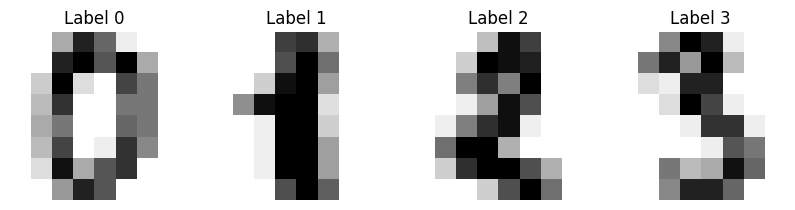

In [42]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label %i" % label)

In [43]:
# flatten the images
n = len(digits.images)
D = digits.images.reshape((n, -1))
y = digits.target

# Split data into 70% train and 30% test subsets
D_train, D_test, y_train, y_test = train_test_split(
    D, y, test_size=0.3, shuffle=False
)

In [44]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', gamma=0.0008, C=0.9)
model = svc.fit(D_train, y_train)
print(svc.score(D_test, y_test))

0.9629629629629629


In [45]:
# Calculate how many supporting vectors classes 0 and 1 have in total
support_vectors = svc.n_support_
all_support_vectors_0_1 = support_vectors[0] + support_vectors[1]
all_support_vectors_0_1

112

In [46]:
# Compute how many supporting vectors are distinguished between classes 0 and 1
all_coeficients_0_1 = model.dual_coef_[0, :all_support_vectors_0_1]
distinguished_coeficients_0_1 = all_coeficients_0_1[np.where(all_coeficients_0_1 != 0)]
distinguished_coeficients_0_1.size

41

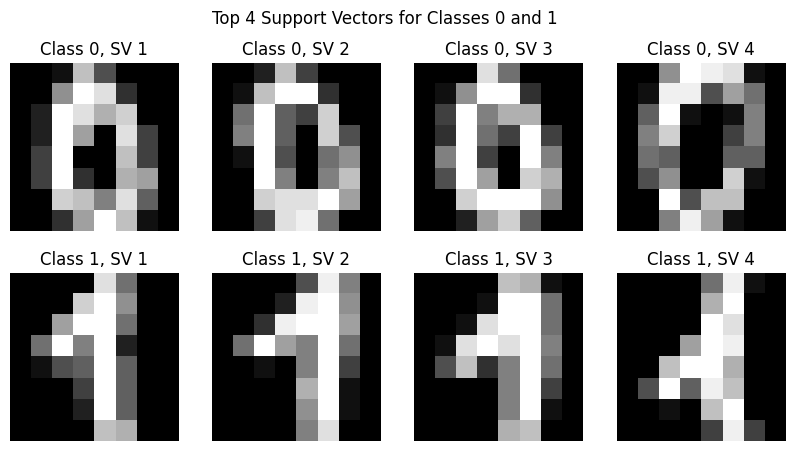

In [47]:
# Extract support vectors and dual coefficients from training
support_vectors = svc.support_vectors_
dual_coef = svc.dual_coef_

# Separate the support vectors for class 0 and class 1
# Dual coefficients have two rows for binary classification
class_0_indices = (dual_coef[0] > 0).nonzero()[0]
class_1_indices = (dual_coef[0] < 0).nonzero()[0]

# Get the top 4 most influential support vectors for each class
top_4_class_0 = support_vectors[class_0_indices[:4]]
top_4_class_1 = support_vectors[class_1_indices[:4]]    


# Plot the support vectors
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
for i, sv in enumerate(top_4_class_0):
    axes[0, i].imshow(sv.reshape(8, 8), cmap='gray')
    axes[0, i].set_title(f"Class 0, SV {i+1}")
    axes[0, i].axis('off')

for i, sv in enumerate(top_4_class_1):
    axes[1, i].imshow(sv.reshape(8, 8), cmap='gray')
    axes[1, i].set_title(f"Class 1, SV {i+1}")
    axes[1, i].axis('off')

plt.suptitle("Top 4 Support Vectors for Classes 0 and 1")
plt.show()


In [48]:
# Create an SVC with RBF kernel
svc = SVC()

# Define the parameter grid
param_grid = {
    'kernel':['rbf'],
    'gamma': [0.0001, 0.0006, 0.001, 0.006],
    'C': [0.6, 0.8, 1, 2, 3, 4, 6]
}

# Create the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5)

# Train the model on the whole dataset D
grid_search.fit(D, y)

# Get the best parameters and the best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Parameters: {'C': 6, 'gamma': 0.0006, 'kernel': 'rbf'}
Best Accuracy: 0.9744073042401734
